In [1]:
import numpy as np
import glob
import os
import h5py
from keras import layers, metrics
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Dropout
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from PIL import Image
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

C:\Users\szczepan\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import pydot

In [3]:
os.chdir("C:/Users/szczepan/fruits/")

In [4]:
filelist = glob.glob('train/Orange/*.jpg')
X_train_oranges =  np.array([np.array(Image.open(fname)) for fname in filelist])
filelist = glob.glob('train/Apple/*.jpg')
X_train_apples =  np.array([np.array(Image.open(fname)) for fname in filelist])

X_train = np.concatenate((X_train_oranges, X_train_apples), axis = 0)

filelist = glob.glob('validation/Orange/*.jpg')
X_val_oranges =  np.array([np.array(Image.open(fname)) for fname in filelist])
filelist = glob.glob('validation/Apple/*.jpg')
X_val_apples =  np.array([np.array(Image.open(fname)) for fname in filelist])

X_val = np.concatenate((X_val_oranges, X_val_apples), axis = 0)

Y_train = np.array([0] * 479 + [1] * 5336)
Y_val = np.array([0] * 160 + [1] * 1619)


print ("number of training examples = " + str(X_train.shape[0]))
print ("number of validation examples = " + str(X_val.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_val shape: " + str(X_val.shape))
print ("Y_val shape: " + str(Y_val.shape))

number of training examples = 5815
number of validation examples = 1779
X_train shape: (5815, 100, 100, 3)
Y_train shape: (5815,)
X_val shape: (1779, 100, 100, 3)
Y_val shape: (1779,)


In [5]:
# Normalize the data
X_train = X_train / 255.0
X_val = X_val / 255.0

**Details of the Fruit dataset**:
- Images are of shape (100, 100, 3)
- Training: 5815 pictures
- Test: 1779 pictures


In [5]:
def fruitModel(input_shape):
    """
    Implementation of the model for classifying apples and oranges. 
    
    Arguments:
    input_shape -- shape of the images of the dataset used

    Returns:
    model -- a Model() instance in Keras
    """

    # MODEL INPUT
    X_input = Input(input_shape)


    X = Conv2D(32, kernel_size = (3, 3), strides = (1, 1), name = 'conv0')(X_input) 
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size = (2, 2), name='max_pool0')(X) 
    

    X = Conv2D(32, kernel_size = (3, 3), strides = (1, 1), name = 'conv1')(X) 
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size = (2, 2), name='max_pool1')(X) 
    

    X = Conv2D(64, kernel_size = (3, 3), strides = (1, 1), name = 'conv2')(X) 
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size = (2, 2), name='max_pool2')(X) 
    

    # Flatten the volume
    X = Flatten()(X)
    
    # Two fully connected layers with dropout
    X = Dense(64, activation='relu', name='fc0')(X)
    X = Dropout(0.5)(X)
    X = Dense(1, activation='sigmoid', name='fc1')(X)
    model = Model(inputs = X_input, outputs = X, name='FruitModel0')
    
    return model

In [6]:
model = fruitModel((100, 100, 3))

In [7]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
class_weight = {0 : 35.0, 1 : 1.0}

In [9]:
model.load_weights("fruit_gen1.h5")

In [26]:
model.fit(X_train, Y_train, batch_size = 32, epochs = 3, class_weight = class_weight, shuffle = True)

Epoch 1/3
5815/5815 [==============================] - 183s 31ms/step - loss: 0.0316 - acc: 0.9983
Epoch 2/3
5815/5815 [==============================] - 128s 22ms/step - loss: 0.2197 - acc: 0.9759
Epoch 3/3
5815/5815 [==============================] - 120s 21ms/step - loss: 0.0526 - acc: 1.0000


In [10]:
model.load_weights('fruit_2_generator.h5')

In [46]:
orange_preds.shape

(160, 1)

In [34]:
apple_preds = model.predict_on_batch(X_val_apples[:1000])

In [11]:
apple_preds2 = model.predict_on_batch(X_val_apples[1300:1619])

In [12]:
print(apple_preds2)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [79]:
datagen = ImageDataGenerator(
        rotation_range=50,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [80]:
train_generator = datagen.flow_from_directory(
        'train',  
        target_size=(100, 100),  
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'validation',
        target_size=(100, 100),
        batch_size=32,
        class_mode='binary')

Found 5815 images belonging to 2 classes.
Found 1779 images belonging to 2 classes.


In [85]:
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='apple', save_format='jpeg'):
    i += 1
    if i > 20:
        break

In [86]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // 32,
        epochs=15,
        validation_data=validation_generator,
        validation_steps=800 // 32,
        class_weight = class_weight)
model.save_weights('fruit_generator_1.h5')

Epoch 1/15
62/62 [==============================] - 62s 999ms/step - loss: 1.4598 - acc: 0.9234 - val_loss: 1.5111 - val_acc: 0.9062
Epoch 2/15
62/62 [==============================] - 71s 1s/step - loss: 1.3324 - acc: 0.9173 - val_loss: 1.5111 - val_acc: 0.9062
Epoch 3/15
62/62 [==============================] - 74s 1s/step - loss: 1.4312 - acc: 0.9112 - val_loss: 1.5111 - val_acc: 0.9062
Epoch 4/15
62/62 [==============================] - 53s 855ms/step - loss: 1.3080 - acc: 0.9189 - val_loss: 1.5111 - val_acc: 0.9062
Epoch 5/15
62/62 [==============================] - 53s 854ms/step - loss: 1.4312 - acc: 0.9112 - val_loss: 1.5111 - val_acc: 0.9062
Epoch 6/15
62/62 [==============================] - 53s 852ms/step - loss: 1.2836 - acc: 0.9204 - val_loss: 1.5111 - val_acc: 0.9062
Epoch 7/15
62/62 [==============================] - 56s 906ms/step - loss: 1.3486 - acc: 0.9163 - val_loss: 1.5111 - val_acc: 0.9062
Epoch 8/15
62/62 [==============================] - 62s 1s/step - loss: 1.3

[[8.738225e-12]]


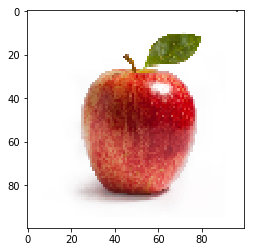

In [11]:
img_path = 'apple-7.jpg'
img = image.load_img(img_path, target_size=(100, 100))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

print(model.predict(x))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
conv0 (Conv2D)               (None, 98, 98, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
max_pool0 (MaxPooling2D)     (None, 49, 49, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 23, 23, 32)        0         
__________

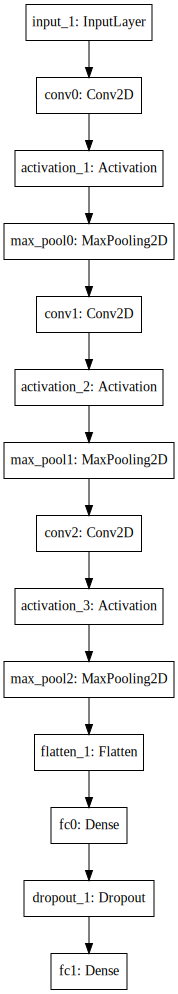

In [26]:
plot_model(model, to_file='FruitModel.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [25]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [10]:
model.load_weights('fruit_0.h5')

In [59]:
model.save_weights('fruit_gen1.h5')